<a href="https://colab.research.google.com/github/kimsihyun0129/ArtificialIntelligence/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 전처리 2

## 결측치(Missing Value)

### 결측치가 포함되어 있는지 확인 : isnull()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


### 데이터셋의 결측치 확인

In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 결측치가 있는 행 전체를 데이터셋에서 제거

In [ ]:
# 결측치가 있는 모든 행 제거
df_1 = df.dropna(axis=0)

print(df_1.isnull().sum()) # 데이터 프레임 결측치 전체
df_1.shape # 데이터 프레임 크기

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


(183, 12)

### fillna() 함수를 이용하여 NaN 값을 대체

In [ ]:
# Age 컬럼의 결측치를 평균으로 대체

print(df['Age'].isnull().sum()) # Age 컬럼의 결측치 개수
age_mean = df["Age"].mean()     # Age 컬럼의 평균
df["Age"].fillna(age_mean, inplace=True)
print(df['Age'].isnull().sum())

177
0


<ipython-input-8-adaa022754a4>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(age_mean, inplace=True)


In [ ]:
# Embarked 컬럼의 결측치를 최빈값으로 대체
from scipy.stats import mode

print(df['Embarked'].isnull().sum())
embarked_mode = df['Embarked'].mode()

# Embarked 컬럼의 결측치를 최빈값으로 대체
df['Embarked'].fillna(embarked_mode[0], inplace=True)
print(df['Embarked'].isnull().sum())

0
0


In [ ]:
# Embarked 변수 내 결측값을 직전행의 값으로 대체하는 코드

df["Embarked"].fillna(method="ffill", inplace=True)
# fillna() 함수에 method="ffill" 옵션을 추가하면 결측치가 있는 행의 직전행에 있는 값으로 대체
# method="bfill"은 행의 바로 다음행에 있는 값으로 대체
print(df['Embarked'].isnull().sum())

0


<ipython-input-13-30adb0760908>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Embarked"].fillna(method="ffill", inplace=True)


## 이상치(outlier)

### 이상치 처리

In [ ]:
# 정규분포 평균 50, 표준편차 10을 가지는 데이터 200개 생성 -> 데이터 프레임으로 변환
data = 10*np.random.randn(200)+50
df = pd.DataFrame({"값":data})

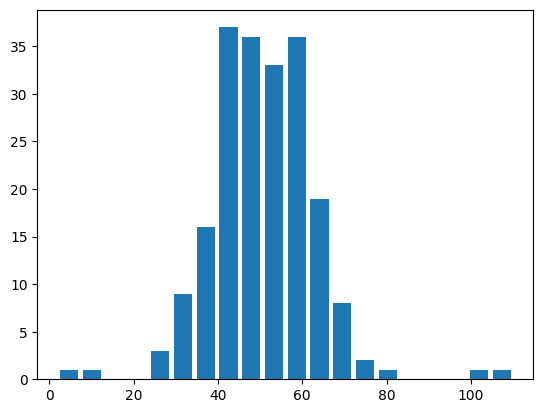

In [ ]:
# 임의의 이상치 삽입
df.loc[201] = 2
df.loc[202] = 100
df.loc[203] = 10
df.loc[204] = 110

# 분포 시각화
plt.hist(df["값"], bins=20, rwidth=0.8)
plt.show()

### IRQ(Interquartile Range, 사분위 범위) 방법

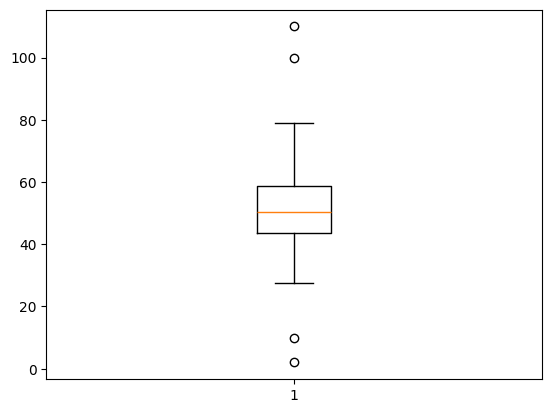

In [ ]:
plt.boxplot(df["값"])
plt.show()

In [ ]:
Q1 = df["값"].quantile(0.25)  # 1사분위수
Q2 = df["값"].quantile(0.5)   # 2사분위수
Q3 = df["값"].quantile(0.75)  # 3사분위수
IQR = Q3 - Q1                 # 사분위 범위

print("Q1 =", Q1)
print("Q2 =", Q2)
print("Q3 =", Q3)
print("IQR =", IQR)

Q1 = 43.49604722094647
Q2 = 50.38494327277435
Q3 = 58.87787802124763
IQR = 15.38183080030116


In [ ]:
Q1 = df["값"].describe()["25%"]  # 1사분위수
Q2 = df["값"].describe()["50%"]  # 2사분위수
Q3 = df["값"].describe()["75%"]  # 3사분위수
IQR = Q3 - Q1                    # 사분위 범위

print("Q1 =", Q1)
print("Q2 =", Q2)
print("Q3 =", Q3)
print("IQR =", IQR)

Q1 = 43.49604722094647
Q2 = 50.38494327277435
Q3 = 58.87787802124763
IQR = 15.38183080030116


In [ ]:
condition = df["값"]>(Q3+1.5*IQR)
upperOutlier = df[condition]
condition = df["값"]<(Q1-1.5*IQR)
lowerOutlier = df[condition]

print(lowerOutlier)
print(upperOutlier)

        값
201   2.0
203  10.0
         값
202  100.0
204  110.0


## 평활화(smoothing)

### 데이터 준비

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/lynx.csv")

print(df.head(10))
print(df.describe())

   rownames  time  value
0         1  1821    269
1         2  1822    321
2         3  1823    585
3         4  1824    871
4         5  1825   1475
5         6  1826   2821
6         7  1827   3928
7         8  1828   5943
8         9  1829   4950
9        10  1830   2577
         rownames         time        value
count  114.000000   114.000000   114.000000
mean    57.500000  1877.500000  1538.017544
std     33.052988    33.052988  1585.843914
min      1.000000  1821.000000    39.000000
25%     29.250000  1849.250000   348.250000
50%     57.500000  1877.500000   771.000000
75%     85.750000  1905.750000  2566.750000
max    114.000000  1934.000000  6991.000000


### 단순 이동 평균(Simple moving Average)

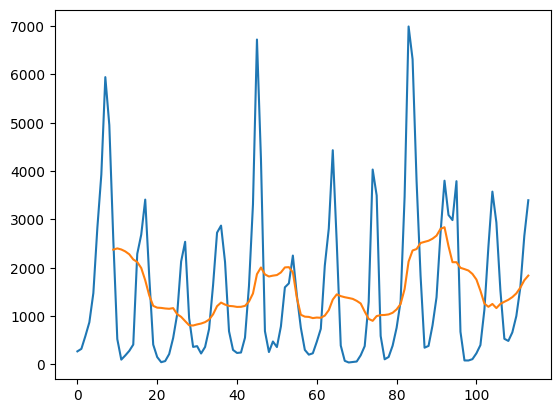

In [ ]:
# 10년 단순 이동 평균
df["sma"] = df["value"].rolling(10).mean()

plt.plot(df["value"])
plt.plot(df["sma"])
plt.show()

### 지수 가중 이동 평균(Exponentially-weighted MA)

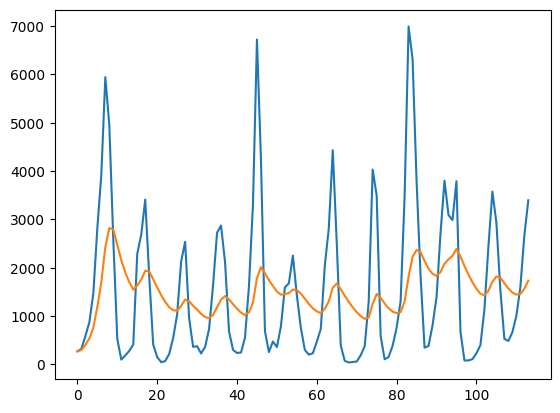

In [ ]:
# 10년 지수 가중 이동 평균
df["ewm"] = df["value"].ewm(10).mean()

plt.plot(df["value"])
plt.plot(df["ewm"])
plt.show()

### 신호 처리 예제

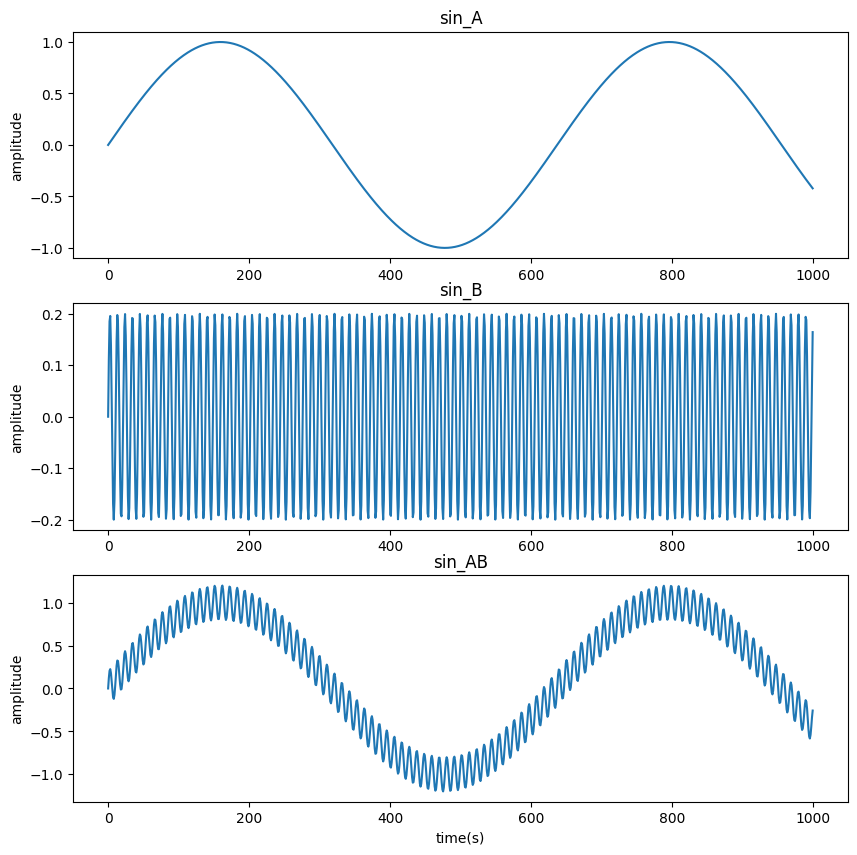

In [ ]:
# A : 진폭, f0 : 주파수, phi : 파이, fs : 샘플링 주파수, t : 시간
# 사인파 신호 생성 함수
def sinusoid(A, f0, phi, fs, t) :
  t = np.arange(0, t, 1.0/fs)
  return A * np.sin(2*np.pi*f0*t*phi)

sin_A = sinusoid(A=1, f0=1, phi=np.pi/2, fs=1000, t=1)
sin_B = sinusoid(A=0.2, f0=60, phi=np.pi/2, fs=1000, t=1)

# 두 개의 신호를 합성(잡음이 포함된 신호)
sin_AB = sin_A+sin_B

fig, ax = plt.subplots(3, 1, figsize=(10, 10))
ax[0].plot(sin_A)
ax[0].set_title("sin_A")
ax[0].set_ylabel ("amplitude")
ax[1].plot(sin_B)
ax[1].set_title("sin_B")
ax[1].set_ylabel ("amplitude")
ax[2].plot(sin_AB)
ax[2].set_title("sin_AB")
ax[2].set_xlabel ("time(s)")
ax[2].set_ylabel("amplitude")
plt.show()

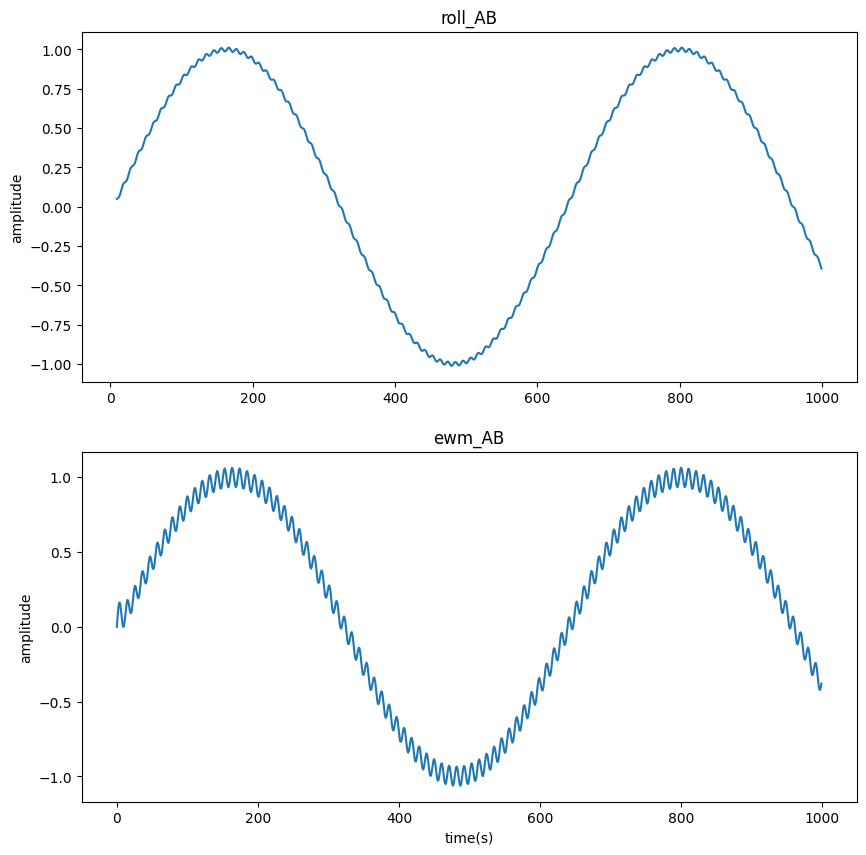

In [ ]:
df = pd. DataFrame( {"value":sin_AB})
roll_AB = df ["value"]. rolling(window=10). mean()
ewm_AB = df ["value"].ewm(span=10).mean()

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot (roll_AB)
ax[0].set_title("roll_AB")
ax[0].set_ylabel ("amplitude")

ax[1].plot(ewm_AB)
ax[1].set_title("ewm_AB")
ax[1].set_xlabel ("time(s)")
ax[1].set_ylabel ("amplitude")
plt.show()